# Breast Cancer Screening by Mammography
Mammography is the most effective method for breast cancer screening
available today. However, the low positive predictive value of breast
biopsy resulting from mammogram interpretation leads to approximately
70% unnecessary biopsies with benign outcomes. To reduce the high
number of unnecessary breast biopsies, several computer-aided diagnosis
(CAD) systems have been proposed in the last years.These systems
help physicians in their decision to perform a breast biopsy on a suspicious
lesion seen in a mammogram or to perform a short term follow-up
examination instead.
This data set can be used to predict the severity (benign or malignant)
of a mammographic mass lesion from BI-RADS attributes and the patient's age.
It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes
together with the ground truth (the severity field) for 516 benign and
445 malignant masses that have been identified on full field digital mammograms
collected at the Institute of Radiology of the
University Erlangen-Nuremberg between 2003 and 2006.
Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign)
to 5 (highly suggestive of malignancy) assigned in a double-review process by
physicians. Assuming that all cases with BI-RADS assessments greater or equal
a given value (varying from 1 to 5), are malignant and the other cases benign,
sensitivities and associated specificities can be calculated. These can be an
indication of how well a CAD system performs compared to the radiologists.

Class Distribution: benign: 516; malignant: 445



# Attribute Information:

6 Attributes in total (1 goal field, 1 non-predictive, 4 predictive attributes)

1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal, goal field!)

Missing Attribute Values:
- BI-RADS assessment: 2
- Age: 5
- Shape: 31
- Margin: 48
- Density: 76
- Severity: 0

Reference: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

# We will build a model to predict whether or not the lump found in the mammography report is malignant using the dataset provided

In [1]:
import pandas as pd
import numpy as np
import joblib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

Read the data from the mammographic_masses.data in a dataframe and explore the data

In [2]:
df = pd.read_csv('mammographic_masses.data')
df.head(5)

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


Notice '?' values in DF for some columns. These indicate missing values. Assign them to NA and read DF again

In [3]:
df = pd.read_csv('mammographic_masses.data', na_values='?', names=['BI-RADS','age', 'Shape', 'Margin', 'Density', 'Severity'])
df.head(5)

,BI-RADS,age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [4]:
df.describe()

,BI-RADS,age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


As we can see there are quite a few missing data values. We are going to drop the rows with missing values.

In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,BI-RADS,age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Now we have the same count for all columns. Lets extract them into Numpy arrays. We will read the first 5 columns in X and last column in y array.

In [7]:
X = df.drop('Severity', axis=1).values

In [8]:
y = df['Severity'].values

Now Let us split our dataset into Train and Test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now that we have the train and test split of our data, let us normalize our data using MinMax Scalar

In [10]:
scalar = MinMaxScaler()

In [11]:
X_train_normalize = scalar.fit_transform(X_train)

In [12]:
X_test_normalize = scalar.transform(X_test)

Now that our data has been normalized, we will build our model. We will build a model with 6 layers

In [13]:
model = Sequential()

model.add(Dense(units=5,input_dim=5, activation='relu'))

model.add(BatchNormalization())
model.add(Dense(units=12, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(BatchNormalization())
model.add(Dense(units=12, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(BatchNormalization())
model.add(Dense(units=5, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
batch_normalization (BatchNo (None, 5)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                72        
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0

Now Lets Train our Model

In [15]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test,y_test),batch_size=64 )

Epoch 1/400
11/11 [==============================] - 2s 78ms/step - loss: 0.7690 - accuracy: 0.5135 - val_loss: 0.9026 - val_accuracy: 0.4639
Epoch 2/400
11/11 [==============================] - 0s 7ms/step - loss: 0.8253 - accuracy: 0.4895 - val_loss: 0.8129 - val_accuracy: 0.4639
Epoch 3/400
11/11 [==============================] - 0s 7ms/step - loss: 0.7658 - accuracy: 0.5337 - val_loss: 0.7700 - val_accuracy: 0.4639
Epoch 4/400
11/11 [==============================] - 0s 7ms/step - loss: 0.7625 - accuracy: 0.5408 - val_loss: 0.7378 - val_accuracy: 0.4940
Epoch 5/400
11/11 [==============================] - 0s 6ms/step - loss: 0.7266 - accuracy: 0.5032 - val_loss: 0.7164 - val_accuracy: 0.5181
Epoch 6/400
11/11 [==============================] - 0s 6ms/step - loss: 0.7569 - accuracy: 0.5408 - val_loss: 0.6978 - val_accuracy: 0.5301
Epoch 7/400
11/11 [==============================] - 0s 6ms/step - loss: 0.7481 - accuracy: 0.5482 - val_loss: 0.6826 - val_accuracy: 0.5301
Epoch 8/400


Epoch 59/400
11/11 [==============================] - 0s 6ms/step - loss: 0.6069 - accuracy: 0.7036 - val_loss: 0.5694 - val_accuracy: 0.7289
Epoch 60/400
11/11 [==============================] - 0s 6ms/step - loss: 0.6217 - accuracy: 0.6476 - val_loss: 0.5621 - val_accuracy: 0.7530
Epoch 61/400
11/11 [==============================] - 0s 7ms/step - loss: 0.5765 - accuracy: 0.7013 - val_loss: 0.5562 - val_accuracy: 0.7711
Epoch 62/400
11/11 [==============================] - 0s 6ms/step - loss: 0.6009 - accuracy: 0.6546 - val_loss: 0.5510 - val_accuracy: 0.7831
Epoch 63/400
11/11 [==============================] - 0s 6ms/step - loss: 0.6053 - accuracy: 0.6877 - val_loss: 0.5612 - val_accuracy: 0.7349
Epoch 64/400
11/11 [==============================] - 0s 7ms/step - loss: 0.6125 - accuracy: 0.6721 - val_loss: 0.5624 - val_accuracy: 0.7349
Epoch 65/400
11/11 [==============================] - 0s 7ms/step - loss: 0.5766 - accuracy: 0.6831 - val_loss: 0.5632 - val_accuracy: 0.7349
Epoch 

11/11 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.7483 - val_loss: 0.5062 - val_accuracy: 0.8434
Epoch 117/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5538 - accuracy: 0.7442 - val_loss: 0.4996 - val_accuracy: 0.8434
Epoch 118/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5475 - accuracy: 0.7540 - val_loss: 0.4965 - val_accuracy: 0.8373
Epoch 119/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5522 - accuracy: 0.7325 - val_loss: 0.5031 - val_accuracy: 0.8434
Epoch 120/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5206 - accuracy: 0.7780 - val_loss: 0.5069 - val_accuracy: 0.8373
Epoch 121/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5329 - accuracy: 0.7684 - val_loss: 0.5378 - val_accuracy: 0.7470
Epoch 122/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5512 - accuracy: 0.7623 - val_loss: 0.5353 - val_accuracy: 0.7590
Epoch 123/400

11/11 [==============================] - 0s 6ms/step - loss: 0.5513 - accuracy: 0.7595 - val_loss: 0.4822 - val_accuracy: 0.8614
Epoch 174/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5003 - accuracy: 0.7643 - val_loss: 0.4829 - val_accuracy: 0.8434
Epoch 175/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5062 - accuracy: 0.7633 - val_loss: 0.4845 - val_accuracy: 0.7831
Epoch 176/400
11/11 [==============================] - 0s 6ms/step - loss: 0.4804 - accuracy: 0.7967 - val_loss: 0.4752 - val_accuracy: 0.8193
Epoch 177/400
11/11 [==============================] - 0s 5ms/step - loss: 0.5279 - accuracy: 0.7719 - val_loss: 0.4764 - val_accuracy: 0.8072
Epoch 178/400
11/11 [==============================] - 0s 5ms/step - loss: 0.4841 - accuracy: 0.7845 - val_loss: 0.4795 - val_accuracy: 0.7952
Epoch 179/400
11/11 [==============================] - 0s 5ms/step - loss: 0.4968 - accuracy: 0.7573 - val_loss: 0.4819 - val_accuracy: 0.7831
Epoch 180/400

11/11 [==============================] - 0s 5ms/step - loss: 0.5013 - accuracy: 0.7720 - val_loss: 0.4869 - val_accuracy: 0.7892
Epoch 231/400
11/11 [==============================] - 0s 6ms/step - loss: 0.4869 - accuracy: 0.7963 - val_loss: 0.4738 - val_accuracy: 0.8313
Epoch 232/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5135 - accuracy: 0.7755 - val_loss: 0.4704 - val_accuracy: 0.8554
Epoch 233/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5014 - accuracy: 0.7646 - val_loss: 0.4792 - val_accuracy: 0.8072
Epoch 234/400
11/11 [==============================] - 0s 6ms/step - loss: 0.4975 - accuracy: 0.7745 - val_loss: 0.4686 - val_accuracy: 0.8554
Epoch 235/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5347 - accuracy: 0.7483 - val_loss: 0.4656 - val_accuracy: 0.8494
Epoch 236/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5414 - accuracy: 0.7911 - val_loss: 0.4721 - val_accuracy: 0.8494
Epoch 237/400

11/11 [==============================] - 0s 6ms/step - loss: 0.4956 - accuracy: 0.7939 - val_loss: 0.4606 - val_accuracy: 0.8313
Epoch 288/400
11/11 [==============================] - 0s 6ms/step - loss: 0.4849 - accuracy: 0.7990 - val_loss: 0.4542 - val_accuracy: 0.8494
Epoch 289/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5111 - accuracy: 0.7860 - val_loss: 0.4656 - val_accuracy: 0.7952
Epoch 290/400
11/11 [==============================] - 0s 6ms/step - loss: 0.4704 - accuracy: 0.7981 - val_loss: 0.4903 - val_accuracy: 0.7831
Epoch 291/400
11/11 [==============================] - 0s 5ms/step - loss: 0.4884 - accuracy: 0.7843 - val_loss: 0.4679 - val_accuracy: 0.7952
Epoch 292/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5055 - accuracy: 0.7960 - val_loss: 0.4589 - val_accuracy: 0.8434
Epoch 293/400
11/11 [==============================] - 0s 6ms/step - loss: 0.4843 - accuracy: 0.7785 - val_loss: 0.4585 - val_accuracy: 0.8494
Epoch 294/400

11/11 [==============================] - 0s 6ms/step - loss: 0.4554 - accuracy: 0.8336 - val_loss: 0.4643 - val_accuracy: 0.8554
Epoch 345/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5199 - accuracy: 0.7892 - val_loss: 0.4634 - val_accuracy: 0.8554
Epoch 346/400
11/11 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.8027 - val_loss: 0.4626 - val_accuracy: 0.8434
Epoch 347/400
11/11 [==============================] - 0s 5ms/step - loss: 0.4750 - accuracy: 0.7807 - val_loss: 0.4576 - val_accuracy: 0.8373
Epoch 348/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5363 - accuracy: 0.7839 - val_loss: 0.4656 - val_accuracy: 0.8253
Epoch 349/400
11/11 [==============================] - 0s 6ms/step - loss: 0.4930 - accuracy: 0.8050 - val_loss: 0.4574 - val_accuracy: 0.8494
Epoch 350/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5495 - accuracy: 0.7644 - val_loss: 0.4874 - val_accuracy: 0.7892
Epoch 351/400

<AxesSubplot:>

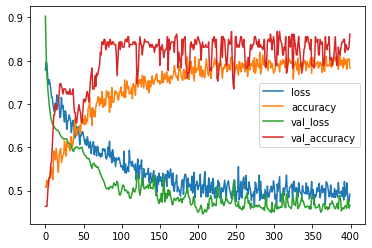

In [16]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [17]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.8614


[0.46639344096183777, 0.8614457845687866]

In [18]:
model.evaluate(X_train,y_train)

21/21 [==============================] - 0s 1ms/step - loss: 0.4597 - accuracy: 0.8419


[0.4596595764160156, 0.8418674468994141]

Our Current model is giving us 86% accuracy on our test set and 84% on our test set.
The model is well regularized and is not overfitted!

In [19]:
model.save('breast_cancer_screening_model.h5')

In [21]:
joblib.dump(scalar,'mammography_scalar.pkl')

['mammography_scalar.pkl']

Pretrained models and scalar saved for usage